# This is a simple example of how to load and plot the provided data.

In [3]:
%pip install zarr
%pip install xarray
%pip install matplotlib

import zarr
import xarray as xr
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Using cached xarray-2025.4.0-py3-none-any.whl.metadata (12 kB)
Using cached xarray-2025.4.0-py3-none-any.whl (1.3 MB)

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
import os
# data_path = "cse151b-spring2025-competition/data/processed_data_cse151b_v2_corrupted_ssp245.zarr"
data_path = "/Users/sammyo/Documents/Climate Prediction Project/cse151b-spring2025-competition/data/processed_data_cse151b_v2_corrupted_ssp245.zarr"
os.path.isdir(data_path)  # should be True for a .zarr directory
os.listdir(data_path)  

['member_id',
 'ssp',
 '.DS_Store',
 '.zattrs',
 'BC',
 'SO2',
 '.zgroup',
 'rsdt',
 'time',
 'pr',
 'CH4',
 'longitude',
 'lon',
 'lat',
 '.zmetadata',
 'x',
 'tas',
 'latitude',
 'CO2',
 'y']

In [9]:
# Load the data (update the path to the correct location)
data_path = "/Users/sammyo/Documents/Climate Prediction Project/cse151b-spring2025-competition/data/processed_data_cse151b_v2_corrupted_ssp245.zarr"
data = xr.open_zarr(
    data_path,
    decode_times=False
)
data

<xarray.Dataset> Size: 621MB
Dimensions:    (ssp: 4, time: 1021, latitude: 48, longitude: 72, x: 72, y: 48,
                member_id: 3)
Coordinates:
    lat        (x, y) float64 28kB ...
  * latitude   (latitude) float64 384B -89.05 -85.26 -81.47 ... 85.26 89.05
    lon        (x, y) float64 28kB ...
  * longitude  (longitude) float64 576B 1.25 6.25 11.25 ... 346.2 351.2 356.2
  * member_id  (member_id) int64 24B 0 1 2
  * ssp        (ssp) <U6 96B 'ssp126' 'ssp245' 'ssp370' 'ssp585'
  * time       (time) int64 8kB 0 31 59 90 120 ... 30903 30933 30964 30994 31025
  * x          (x) float64 576B 1.875 6.875 11.88 16.88 ... 346.9 351.9 356.9
  * y          (y) float64 384B -88.59 -84.82 -81.05 ... 81.05 84.82 88.59
Data variables:
    BC         (ssp, time, latitude, longitude) float64 113MB ...
    CH4        (ssp, time) float64 33kB ...
    CO2        (ssp, time) float64 33kB ...
    SO2        (ssp, time, latitude, longitude) float64 113MB ...
    pr         (ssp, time, member_id, y, x) float32 169MB ...
    rsdt       (ssp, time, y, x) float32 56MB ...
    tas        (ssp, time, member_id, y, x) float32 169MB ...
Attributes:
    original_member_ids:  ['r10i1p1f1', 'r11i1p1f1', 'r4i1p1f1']
    precipitation_units:  mm/day (converted from kg m-2 s-1)
    source:               CMIP6 data processed for CSE151B
    ssp:                  ssp126

In [43]:
print(data)

<xarray.Dataset> Size: 621MB
Dimensions:    (ssp: 4, time: 1021, latitude: 48, longitude: 72, x: 72, y: 48,
                member_id: 3)
Coordinates:
    lat        (x, y) float64 28kB ...
  * latitude   (latitude) float64 384B -89.05 -85.26 -81.47 ... 85.26 89.05
    lon        (x, y) float64 28kB ...
  * longitude  (longitude) float64 576B 1.25 6.25 11.25 ... 346.2 351.2 356.2
  * member_id  (member_id) int64 24B 0 1 2
  * ssp        (ssp) <U6 96B 'ssp126' 'ssp245' 'ssp370' 'ssp585'
  * time       (time) int64 8kB 0 31 59 90 120 ... 30903 30933 30964 30994 31025
  * x          (x) float64 576B 1.875 6.875 11.88 16.88 ... 346.9 351.9 356.9
  * y          (y) float64 384B -88.59 -84.82 -81.05 ... 81.05 84.82 88.59
Data variables:
    BC         (ssp, time, latitude, longitude) float64 113MB ...
    CH4        (ssp, time) float64 33kB ...
    CO2        (ssp, time) float64 33kB ...
    SO2        (ssp, time, latitude, longitude) float64 113MB ...
    pr         (ssp, time, member_id, y

## Plot a few snapshots of temperature and precipitation (first, middle, and last)

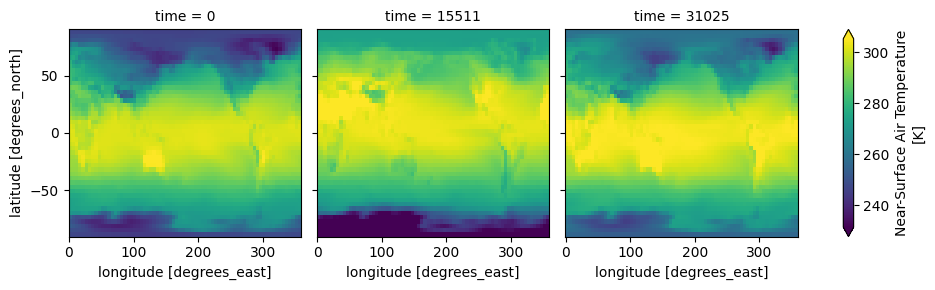

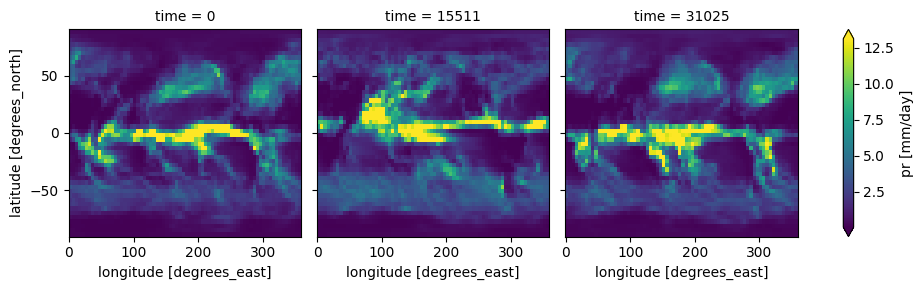

In [10]:
data_subset = data.isel(time=[0, data.time.size // 2, -1]).sel(ssp="ssp370", member_id=0)
data_subset.tas.plot(col="time", x="x", y="y", robust=True)
data_subset.pr.plot(col="time", x="x", y="y", robust=True)

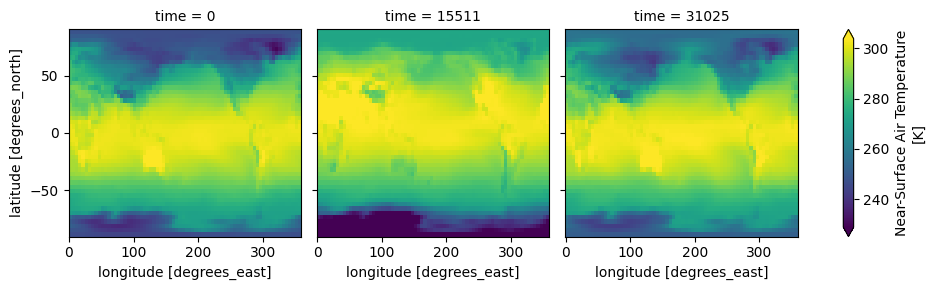

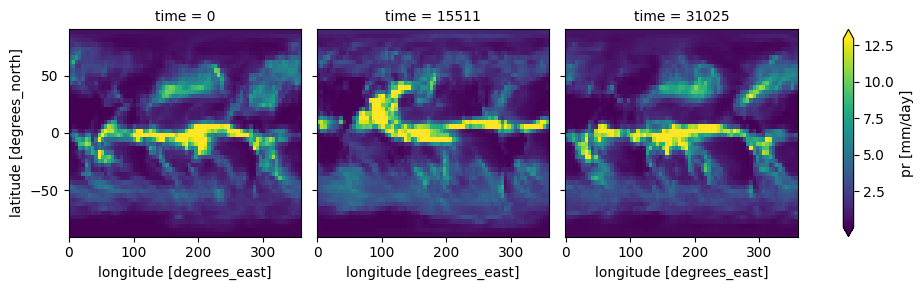

In [29]:
data_subset = data.isel(time=[0, data.time.size // 2, -1]).sel(ssp="ssp126", member_id=0)
data_subset.tas.plot(col="time", x="x", y="y", robust=True)
data_subset.pr.plot(col="time", x="x", y="y", robust=True)

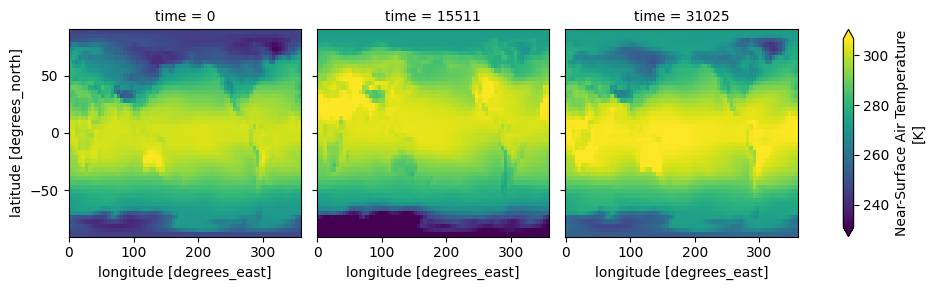

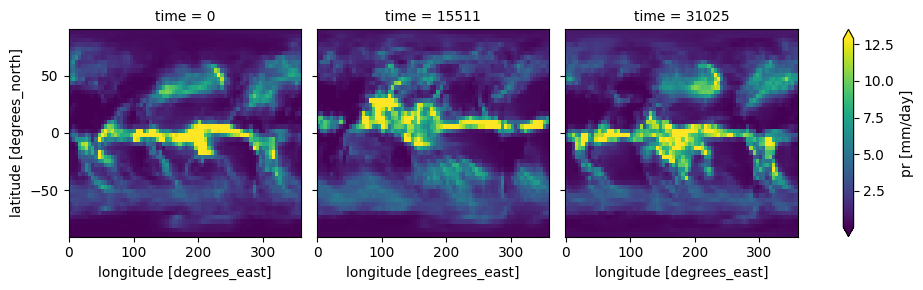

In [30]:
data_subset = data.isel(time=[0, data.time.size // 2, -1]).sel(ssp="ssp585", member_id=0)
data_subset.tas.plot(col="time", x="x", y="y", robust=True)
data_subset.pr.plot(col="time", x="x", y="y", robust=True)

# Plot the time series of global mean temperature and precipitation

Note that we do not plot the SSP245 scenario here, as it is corrupted in the provided data.

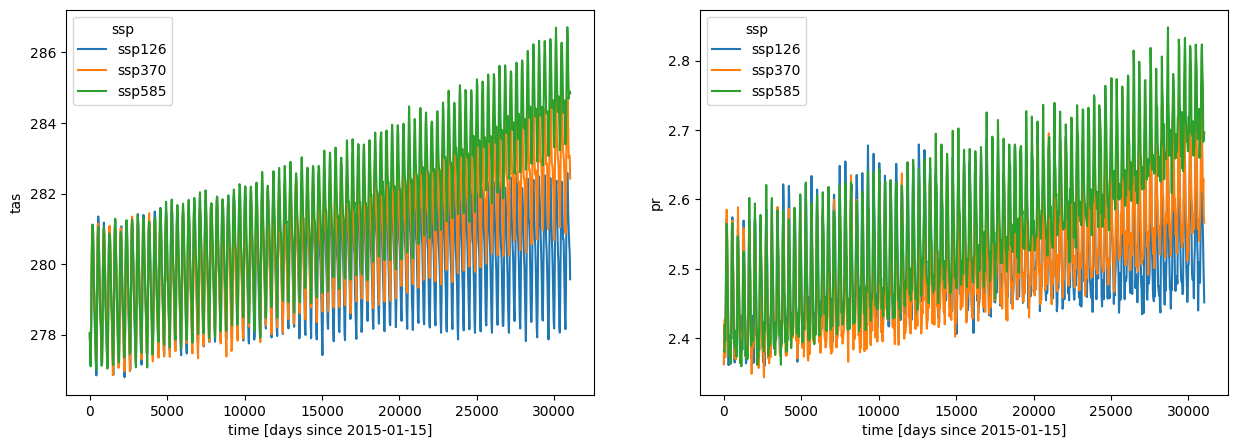

In [11]:
global_mean_data = data.sel(ssp=["ssp126", "ssp370", "ssp585"]).mean(dim=["x", "y", "member_id"])  # also average over all ensemble members
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
global_mean_data.tas.plot(label="Temperature", ax=ax[0], hue="ssp")
global_mean_data.pr.plot(label="Precipitation", ax=ax[1], hue="ssp")# Plot the time series of global mean temperature and precipitation

# Plot the (global mean) time series of climate forcings

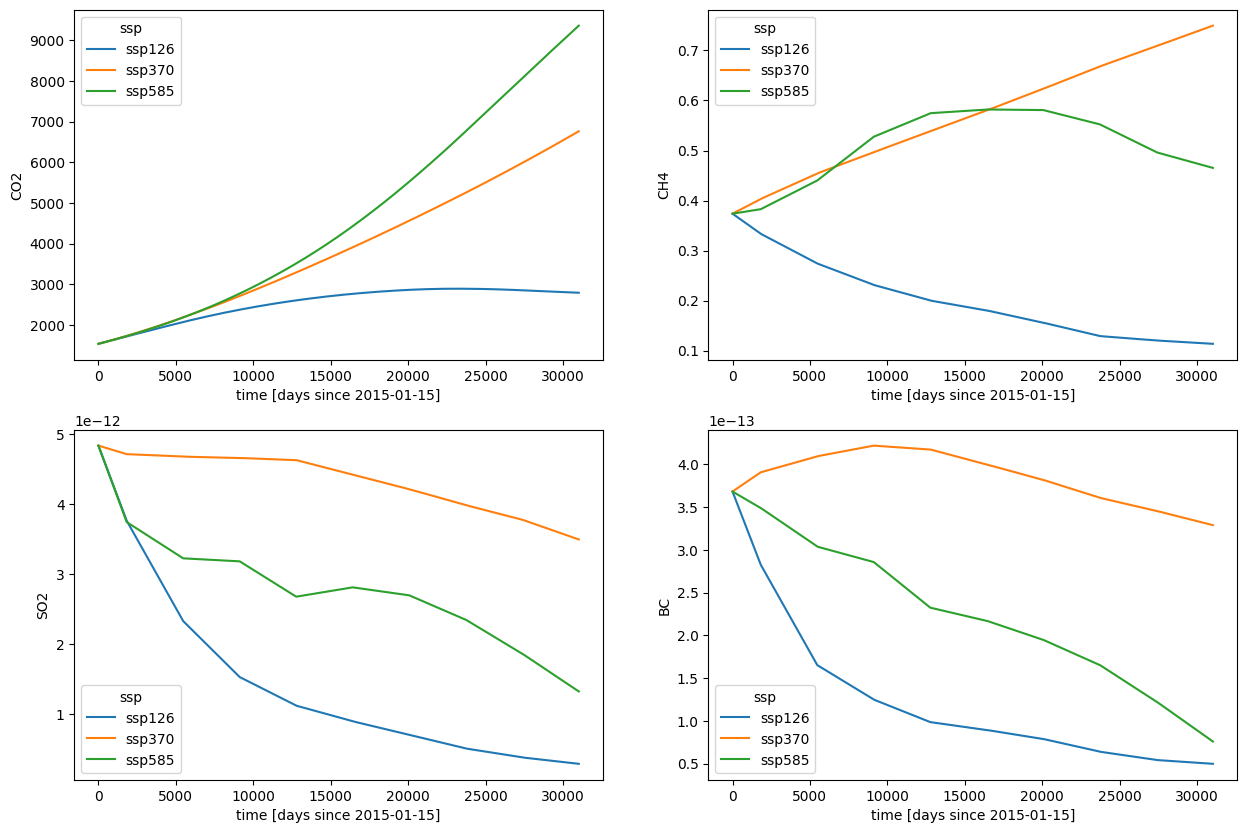

In [39]:
global_mean_data = data.sel(ssp=["ssp126", "ssp370", "ssp585"]).mean(dim=["longitude", "latitude", "member_id"]) 
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()
global_mean_data.CO2.plot(ax=axes[0], hue="ssp")
global_mean_data.CH4.plot(ax=axes[1], hue="ssp")
global_mean_data.SO2.plot(ax=axes[2], hue="ssp")
_ = global_mean_data.BC.plot(ax=axes[3], hue="ssp")



/var/folders/23/mrtwyc0511g8wvv9_hjfvsl00000gn/T/ipykernel_25592/3418539886.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(series, labels=scenarios, notch=True, patch_artist=True)
/var/folders/23/mrtwyc0511g8wvv9_hjfvsl00000gn/T/ipykernel_25592/3418539886.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(series, labels=scenarios, notch=True, patch_artist=True)
/var/folders/23/mrtwyc0511g8wvv9_hjfvsl00000gn/T/ipykernel_25592/3418539886.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(series, labels=scenarios, notch=True, patch_artist=True)
/var/folders/23/mrtwyc0511g8wvv9_h

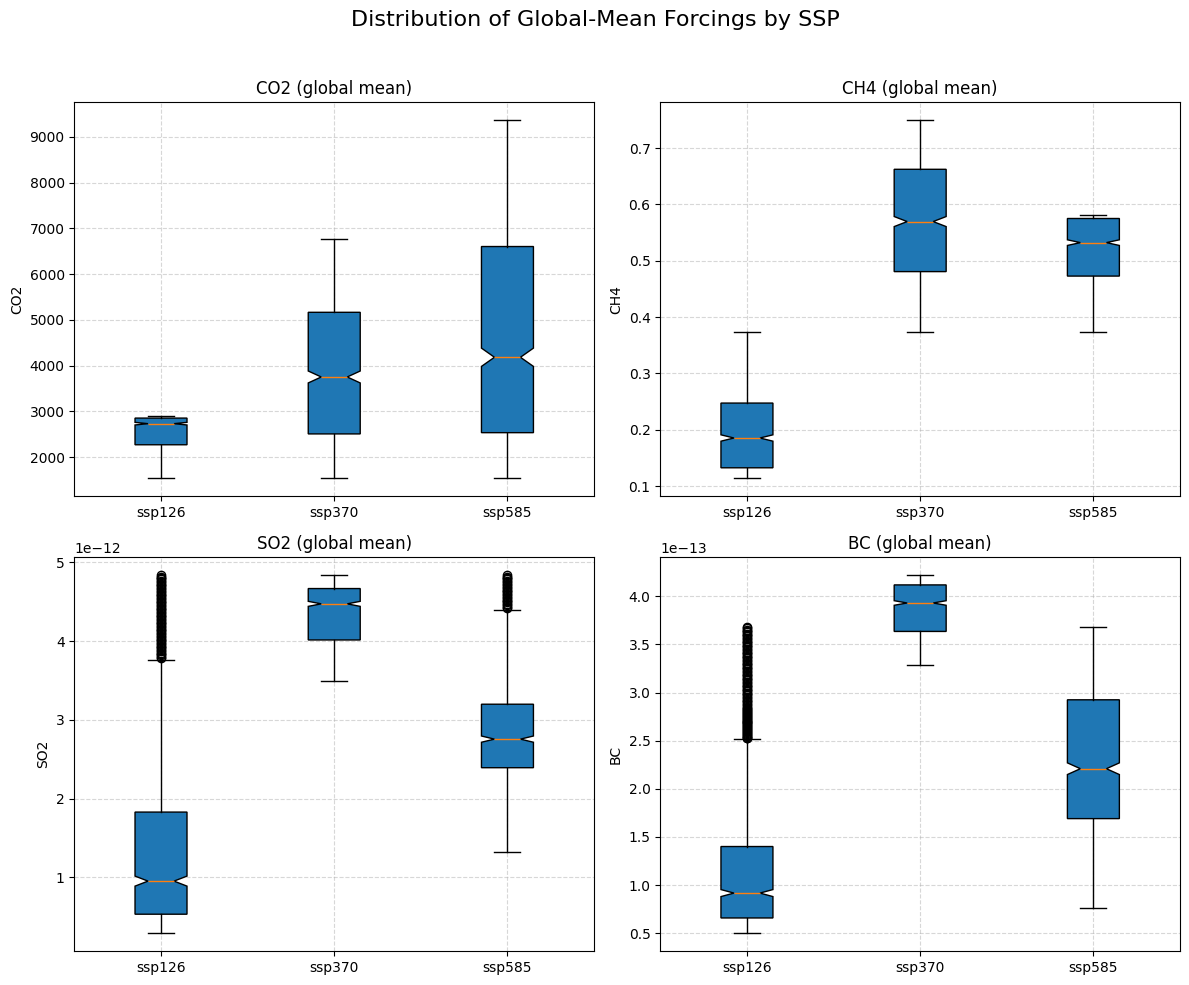

In [59]:
import matplotlib.pyplot as plt

# recompute global_mean_data if needed
global_mean_data = (
    data
    .sel(ssp=["ssp126","ssp370","ssp585"])
    .mean(dim=["longitude","latitude","member_id"])
)

vars_to_plot = ["CO2", "CH4", "SO2", "BC"]
scenarios   = global_mean_data.ssp.values

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for ax, var in zip(axes, vars_to_plot):
    # gather the time series for each scenario into a list
    series = [global_mean_data[var].sel(ssp=ssp).values
              for ssp in scenarios]
    # make the boxplot
    ax.boxplot(series, labels=scenarios, notch=True, patch_artist=True)
    ax.set_title(f"{var} (global mean)")
    ax.set_ylabel(var)
    ax.grid(True, linestyle="--", alpha=0.5)

# hide any unused subplot (if you had fewer than 4 variables)
for ax in axes[len(vars_to_plot):]:
    ax.axis("off")

plt.suptitle("Distribution of Global‐Mean Forcings by SSP", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


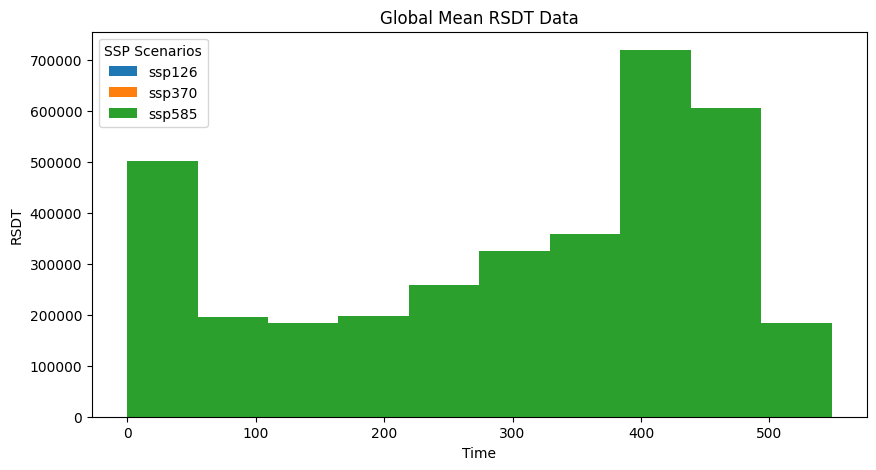

In [61]:
import matplotlib.pyplot as plt

global_mean_data = data.sel(ssp=["ssp126", "ssp370", "ssp585"]).mean(dim=["longitude", "latitude", "member_id"]) 
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Iterate over each SSP scenario and plot it
for ssp in global_mean_data.ssp.values:
    global_mean_data.sel(ssp=ssp).rsdt.plot(ax=ax, label=ssp)

# Add legend and labels
ax.legend(title="SSP Scenarios")
ax.set_title("Global Mean RSDT Data")
ax.set_xlabel("Time")
ax.set_ylabel("RSDT")
plt.show()

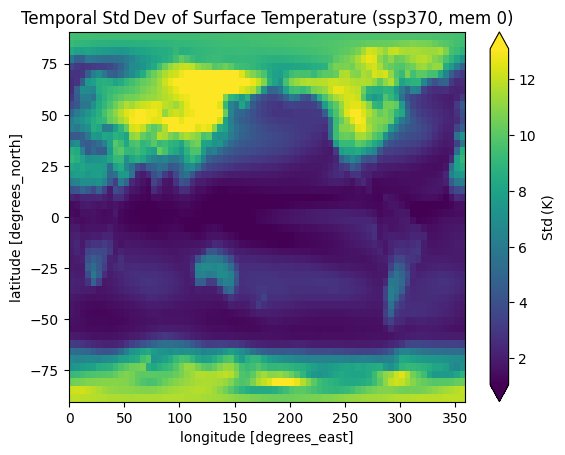

In [14]:
# pick one scenario & ensemble member (or you can also collapse `member_id`)
tas_ssp = data.tas.sel(ssp="ssp370", member_id=0)

# compute standard deviation along the time axis
std_tas = tas_ssp.std(dim="time")

# plot as a global map
std_tas.plot(
    x="x", y="y",
    cmap="viridis",
    cbar_kwargs={"label": "Std (K)"},
    robust=True,
)
plt.title("Temporal Std Dev of Surface Temperature (ssp370, mem 0)")
plt.show()


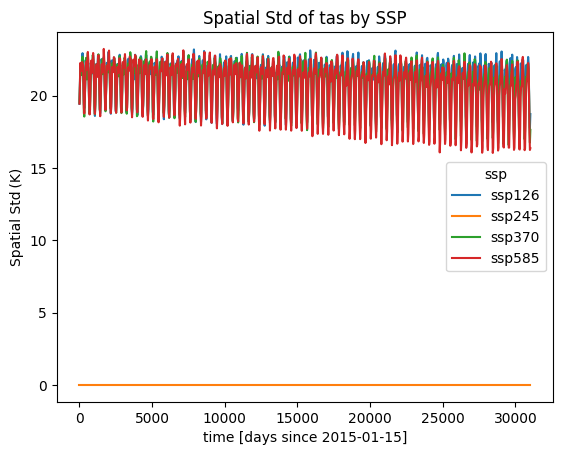

In [16]:
# compute spatial std for each ssp & time (averaging over members if you like)
spatial_std_all = data.tas.std(dim=["x","y","member_id"])
spatial_std_all.plot.line(x="time", hue="ssp")
plt.ylabel("Spatial Std (K)")
plt.title("Spatial Std of tas by SSP")
plt.show()


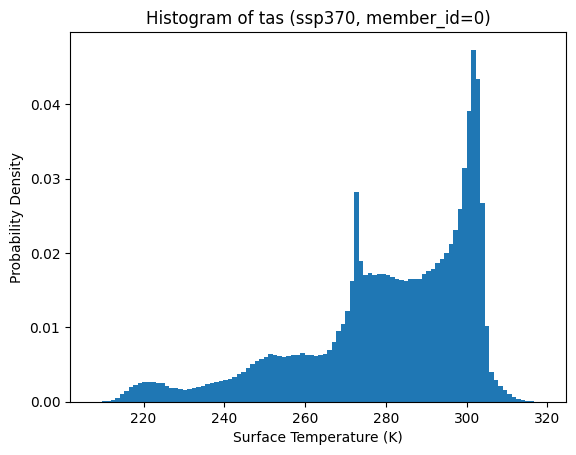

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# flatten the 3D field (time, lat, lon) into 1D
tas_vals = data.tas.sel(ssp="ssp370", member_id=0).values.ravel()

plt.figure()
plt.hist(tas_vals, bins=100, density=True)
plt.xlabel("Surface Temperature (K)")
plt.ylabel("Probability Density")
plt.title("Histogram of tas (ssp370, member_id=0)")
plt.show()


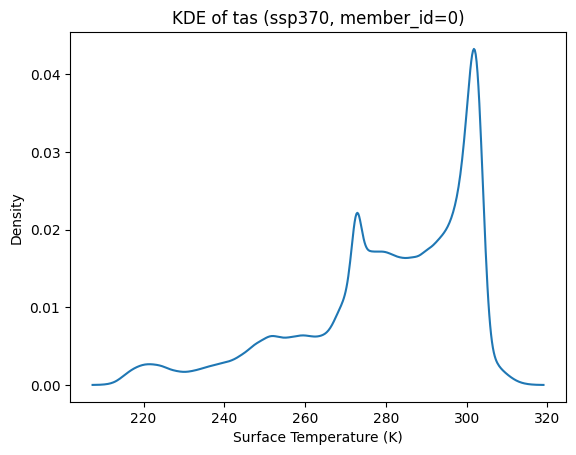

In [20]:
from scipy.stats import gaussian_kde

kde = gaussian_kde(tas_vals)
xs  = np.linspace(tas_vals.min(), tas_vals.max(), 500)

plt.figure()
plt.plot(xs, kde(xs))
plt.xlabel("Surface Temperature (K)")
plt.ylabel("Density")
plt.title("KDE of tas (ssp370, member_id=0)")
plt.show()


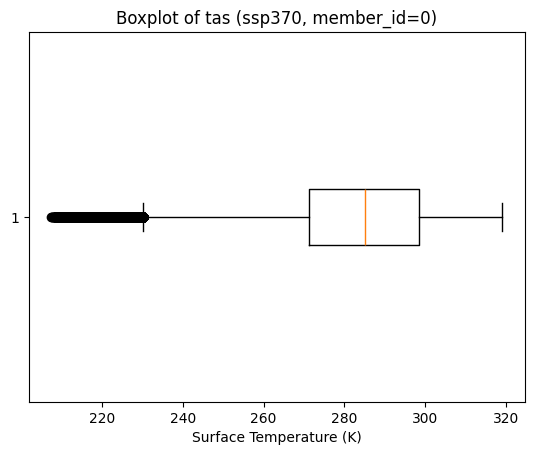

In [21]:
plt.figure()
plt.boxplot(tas_vals, vert=False)
plt.xlabel("Surface Temperature (K)")
plt.title("Boxplot of tas (ssp370, member_id=0)")
plt.show()


/var/folders/23/mrtwyc0511g8wvv9_hjfvsl00000gn/T/ipykernel_25592/413184520.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels)


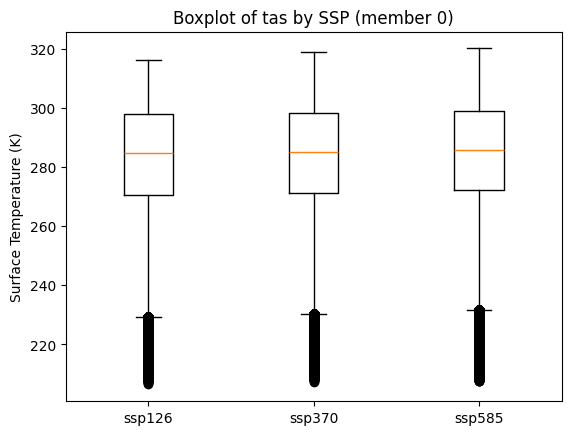

In [22]:
groups = []
labels = ["ssp126","ssp370","ssp585"]
for s in labels:
    vals = data.tas.sel(ssp=s, member_id=0).values.ravel()
    groups.append(vals)

plt.figure()
plt.boxplot(groups, labels=labels)
plt.ylabel("Surface Temperature (K)")
plt.title("Boxplot of tas by SSP (member 0)")
plt.show()


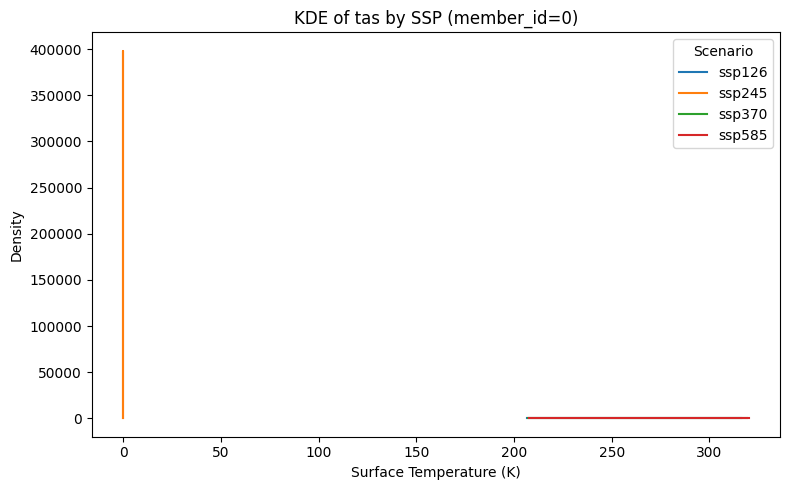

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# list of scenarios to compare
ssps = ["ssp126", "ssp245", "ssp370", "ssp585"]
plt.figure(figsize=(8,5))

for ssp in ssps:
    # grab all tas values (time × lat × lon) for this SSP, first member
    vals = data.tas.sel(ssp=ssp, member_id=0).values.ravel()
    # add small noise to avoid singular covariance matrix
    vals += np.random.normal(0, 1e-6, size=vals.shape)
    # compute KDE
    kde = gaussian_kde(vals)
    xs  = np.linspace(vals.min(), vals.max(), 500)
    # plot
    plt.plot(xs, kde(xs), label=ssp)

plt.xlabel("Surface Temperature (K)")
plt.ylabel("Density")
plt.title("KDE of tas by SSP (member_id=0)")
plt.legend(title="Scenario")
plt.tight_layout()
plt.show()


In [32]:
# 1) Print out all the coordinate names and their sizes
print(data.dims)
# e.g. {'time': 480, 'latitude': 48, 'longitude': 72, 'ssp': 3, 'member_id': 1}

# 2) List the actual SSP labels
print("SSP scenarios:", data.coords["ssp"].values)
# e.g. ['ssp126' 'ssp370' 'ssp585']

# 3) How many distinct SSPs?
print("Number of SSPs:", data.coords["ssp"].size)
# e.g. 3

# 4) (Optional) if you suspect duplicates and want to be super-sure:
import numpy as np
unique_ssps = np.unique(data.ssp.values)
print("Unique SSPs:", unique_ssps, "(", len(unique_ssps), "total )")
# Print all the different variables in the dataset
print("Variables in the dataset:", list(data.data_vars))


FrozenMappingWarningOnValuesAccess({'ssp': 4, 'time': 1021, 'latitude': 48, 'longitude': 72, 'x': 72, 'y': 48, 'member_id': 3})
SSP scenarios: ['ssp126' 'ssp245' 'ssp370' 'ssp585']
Number of SSPs: 4
Unique SSPs: ['ssp126' 'ssp245' 'ssp370' 'ssp585'] ( 4 total )
Variables in the dataset: ['BC', 'CH4', 'CO2', 'SO2', 'pr', 'rsdt', 'tas']


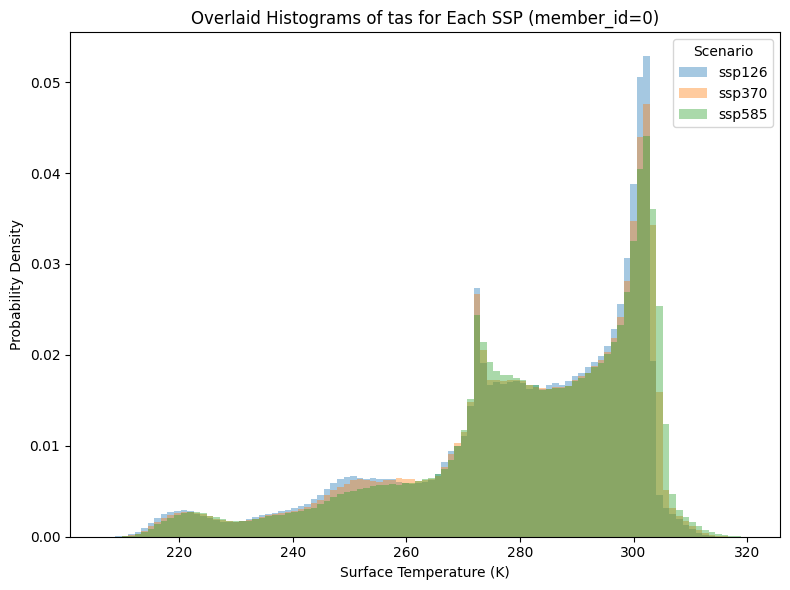

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# List your scenarios
ssps = ['ssp126', 'ssp370', 'ssp585']

# Pull out all the flattened values once so we can compute shared bin edges
all_vals = np.concatenate([
    data.tas.sel(ssp=ssp, member_id=0).values.ravel()
    for ssp in ssps
])

# Define 100 bins spanning the global min→max
bins = np.linspace(all_vals.min(), all_vals.max(), 100)

plt.figure(figsize=(8,6))

for ssp in ssps:
    vals = data.tas.sel(ssp=ssp, member_id=0).values.ravel()
    plt.hist(
        vals,
        bins=bins,
        density=True,
        alpha=0.4,        # semi‐transparent so overlaps show
        label=ssp
    )

plt.xlabel("Surface Temperature (K)")
plt.ylabel("Probability Density")
plt.title("Overlaid Histograms of tas for Each SSP (member_id=0)")
plt.legend(title="Scenario")
plt.tight_layout()
plt.show()


In [ ]:
# flatten time dimension, compute Pearson r at each lat/lon
import xarray as xr

r = xr.apply_ufunc(
    lambda x, y: np.corrcoef(x, y)[0,1],
    data.CO2, data.tas,
    input_core_dims=[["time"], ["time"]],
    vectorize=True
)

r.sel(ssp="ssp370", member_id=0).plot(
    x="longitude", y="latitude",
    cmap="RdBu_r", vmin=-1, vmax=1,
    cbar_kwargs={"label": "r"}
)
plt.title("Correlation CO₂ vs tas (ssp370)")
plt.show()


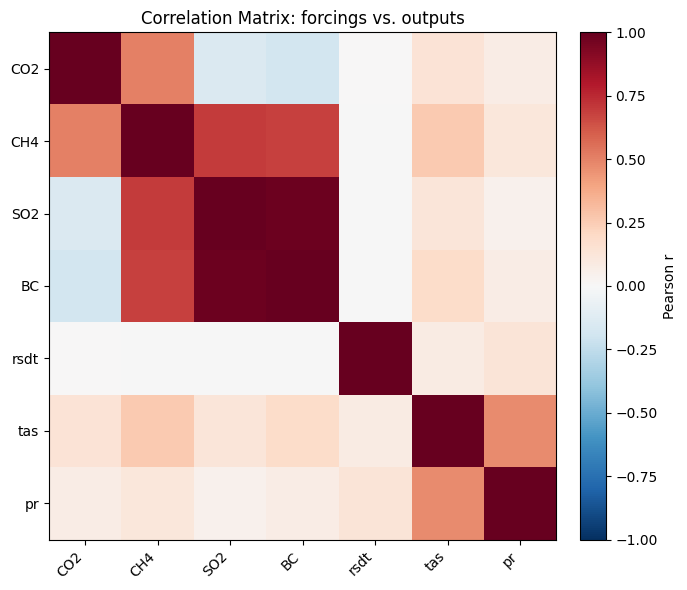

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Collapse out space & ensemble members
gm = data.mean(dim=["longitude","latitude","member_id"])

# 2) Turn into a “long” DataFrame indexed by (time, ssp)
df = gm.to_dataframe().reset_index()
#    columns: time, ssp, CO2, CH4, SO2, BC, rsdt, tas, pr

# 3) Option A: correlate across all (time × ssp) samples
#    — treats each time‐scenario as an independent sample
corr = df[["CO2","CH4","SO2","BC","rsdt","tas","pr"]].corr()

# 4) Plot the matrix
fig, ax = plt.subplots(figsize=(7,6))
im = ax.imshow(corr, vmin=-1, vmax=1, cmap="RdBu_r")
# tick labels
vars = corr.columns
ax.set_xticks(range(len(vars)))
ax.set_yticks(range(len(vars)))
ax.set_xticklabels(vars, rotation=45, ha="right")
ax.set_yticklabels(vars)
# colorbar & title
cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label("Pearson r")
ax.set_title("Correlation Matrix: forcings vs. outputs")
plt.tight_layout()
plt.show()
